# Práctica 1

### Parte 4: Filtros morfológicos

In [2]:
from PIL import Image
import numpy as np
from skimage.filters import threshold_otsu
import math

C:\Users\Jose Giner\Anaconda3\lib\site-packages\dask\config.py:131: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [3]:
im = Image.open("morf.png")
im.mode

'RGBA'

Convertimos a escala de grises:

L


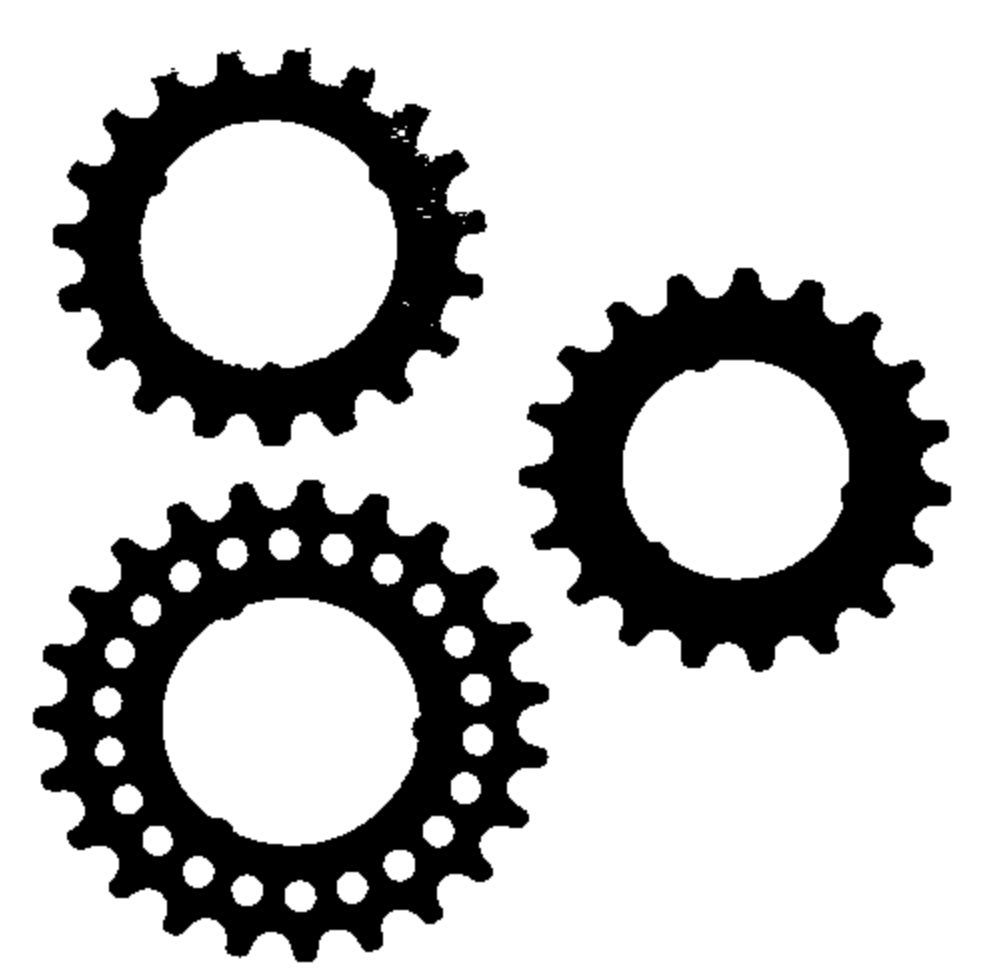

In [4]:
im = im.convert('L')
print(im.mode)
I = np.array(im)
im

In [5]:
np.histogram(I, bins = 256, range = (0,255))[0]

array([233152,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
         2119,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
         4238,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
         5688,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            6,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

Umbralizamos la imagen con Otsu global

In [6]:
th = threshold_otsu(I)
mask = np.zeros(I.shape)
mask[I<=th] = 255
mask = 255 - mask

In [14]:
def Erosionado(I, size):
    
    B = np.zeros((size,size))
    res = np.full(I.shape,255)
    
    for i in range(I.shape[0] - size + 1):
        for j in range(I.shape[1] - size + 1):
            if np.array_equal(I[i:i+size, j:j+size], B):
                res[i + size//2,j + size//2] = 0
    
    
    return res
    


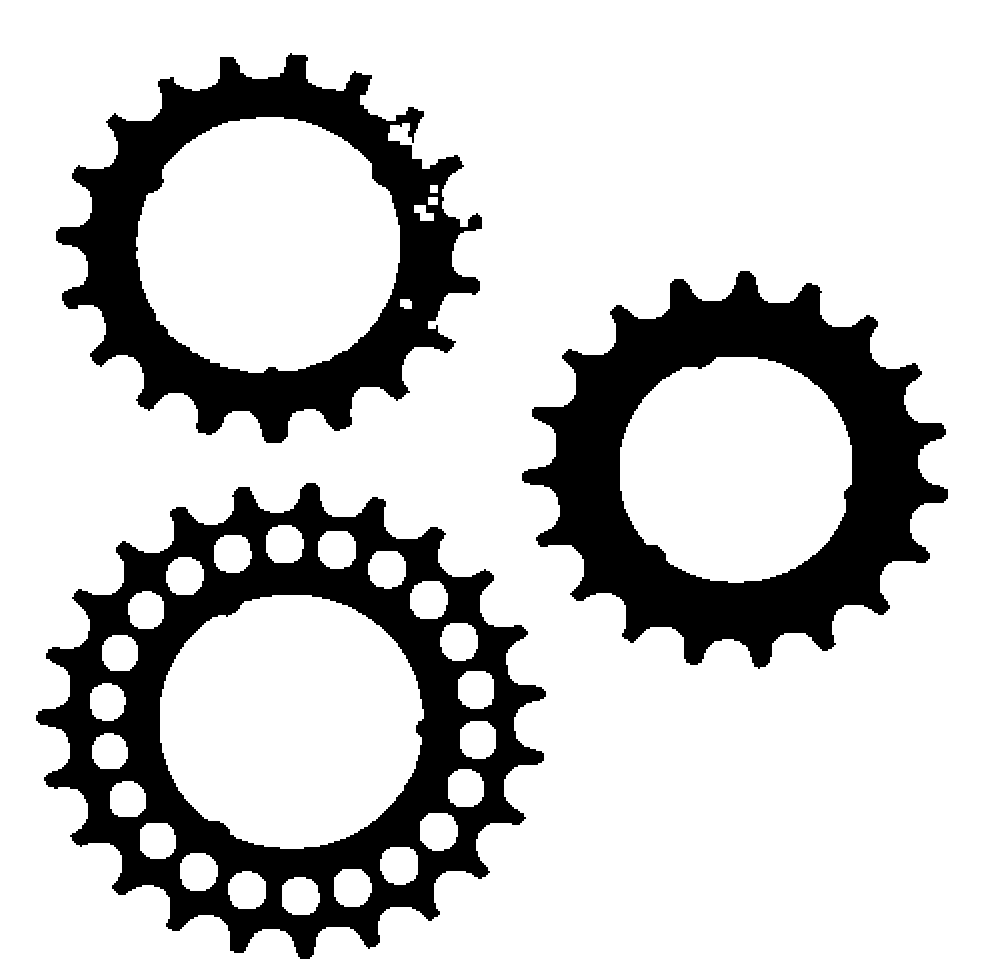

In [16]:
S = Erosionado(mask, 7)
im = np.uint8(S)
im = Image.fromarray(im)
im

In [17]:
def Dilatado(I,size):
    
    B = np.zeros((size,size))
    res = np.full(I.shape,255)
    
    for i in range(I.shape[0] - size + 1):
        for j in range(I.shape[1] - size + 1):
            if B[0][0] in I[i:i+size, j:j+size]:
                res[i + size//2,j + size//2] = 0
    
    
    return res

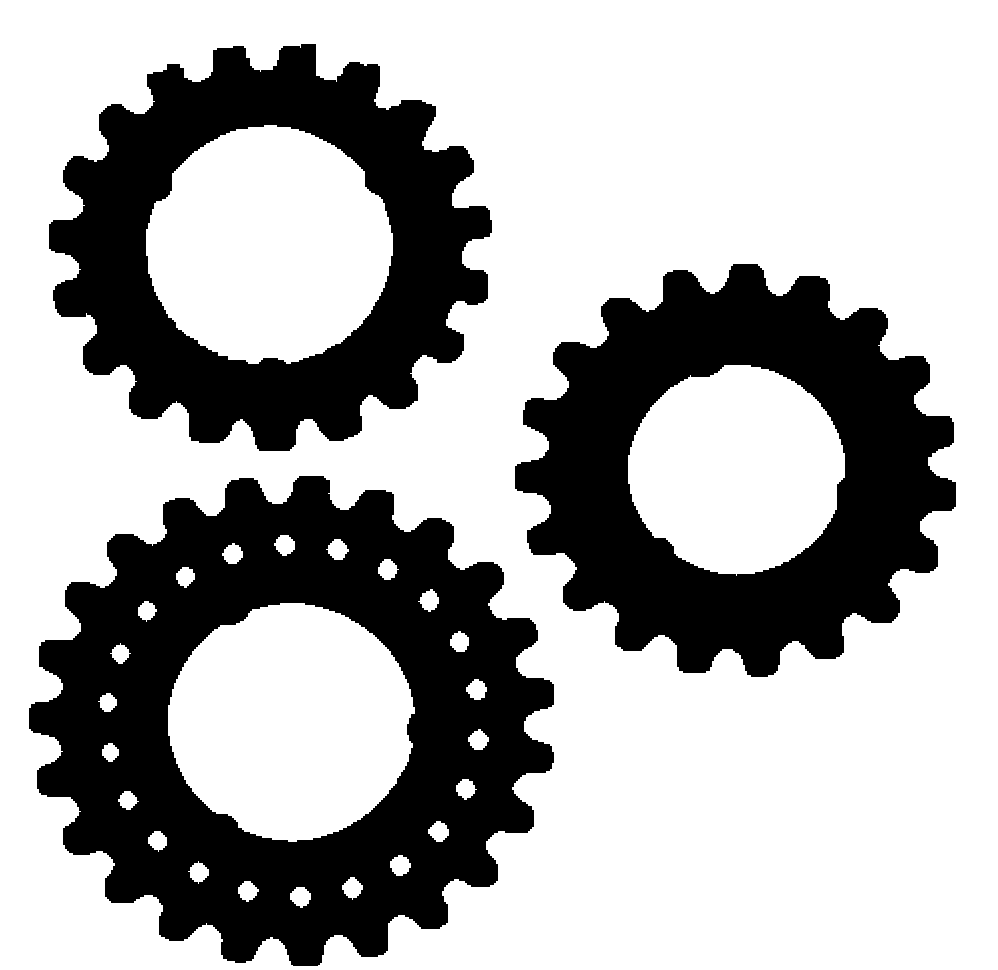

In [18]:
S = Dilatado(mask,10)
im = np.uint8(S)
im = Image.fromarray(im)
im

In [19]:
def Cierre(I, size):
    img_dilatada = Dilatado(I, size)
    return Erosionado(img_dilatada, size)

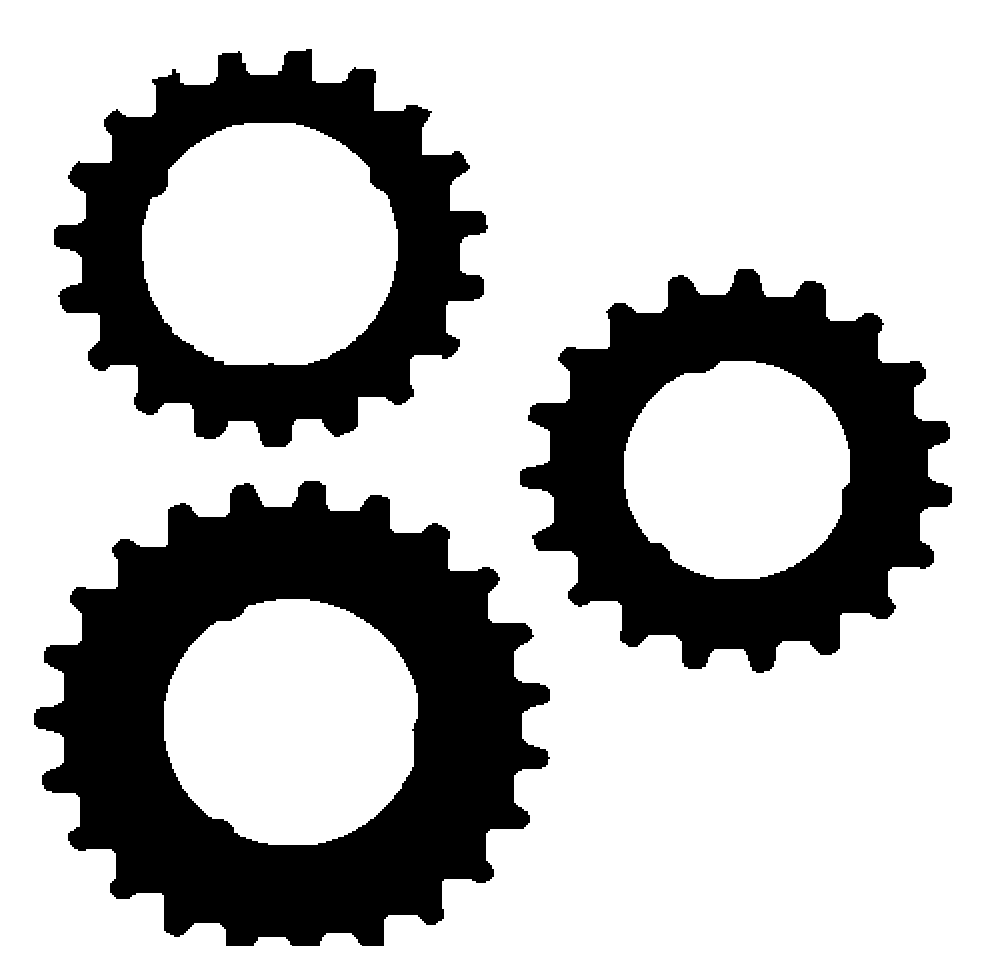

In [20]:
S = Cierre(mask,26)
im = np.uint8(S)
im = Image.fromarray(im)
im

In [21]:
def Apertura(I, size):
    img_erosionada = Erosionado(I, size)
    return Dilatado(img_erosionada, size)

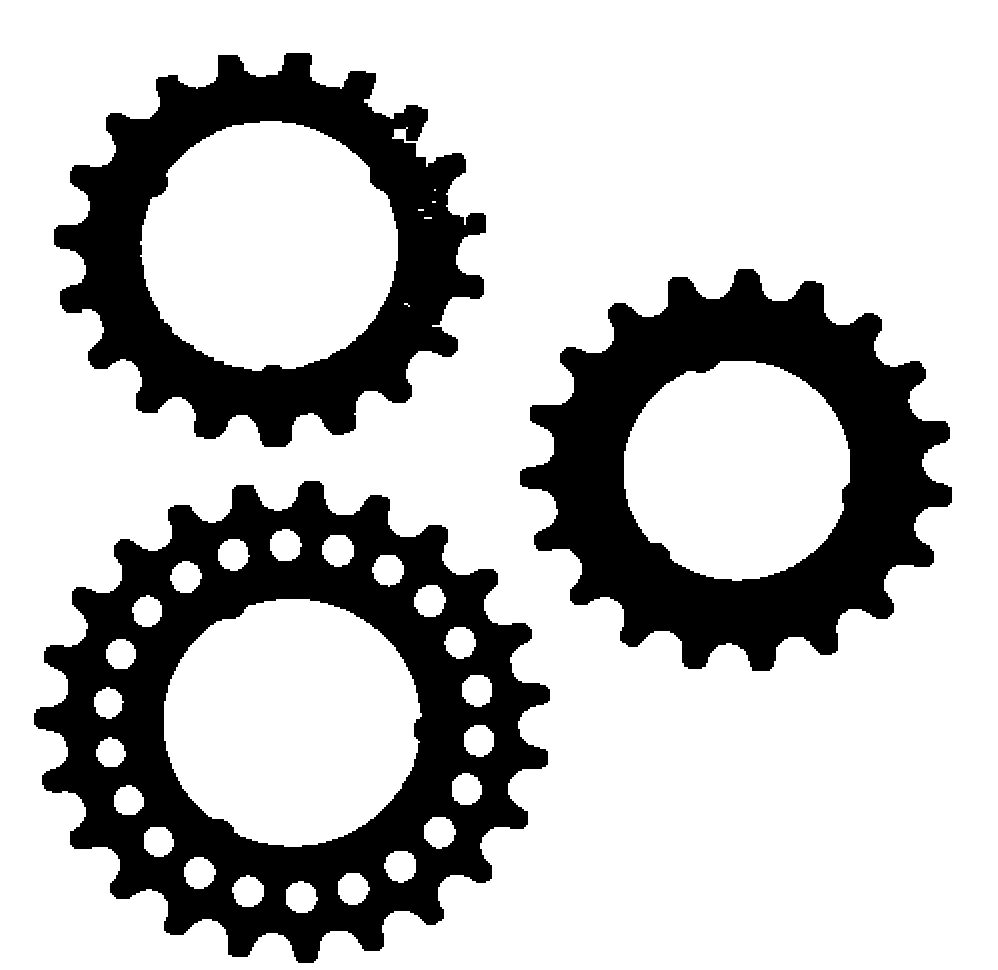

In [22]:
S = Apertura(mask,10)
im = np.uint8(S)
im = Image.fromarray(im)
im